In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\intern exercise\cereal.csv")
df.head(3)

name mfr type  calories  protein  fat  sodium  fiber  carbo  \
0          100% Bran   N    C        70        4    1     130   10.0    5.0   
1  100% Natural Bran   Q    C       120        3    5      15    2.0    8.0   
2           All-Bran   K    C        70        4    1     260    9.0    7.0   

   sugars  potass  vitamins  shelf  weight  cups     rating  
0       6     280        25      3     1.0  0.33  68.402973  
1       8     135         0      3     1.0  1.00  33.983679  
2       5     320        25      3     1.0  0.33  59.425505

In [3]:
df.shape

(77, 16)

In [4]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [5]:
from ydata_profiling import ProfileReport

In [6]:
pf=ProfileReport(df) 
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [8]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

Univariate Analysis:

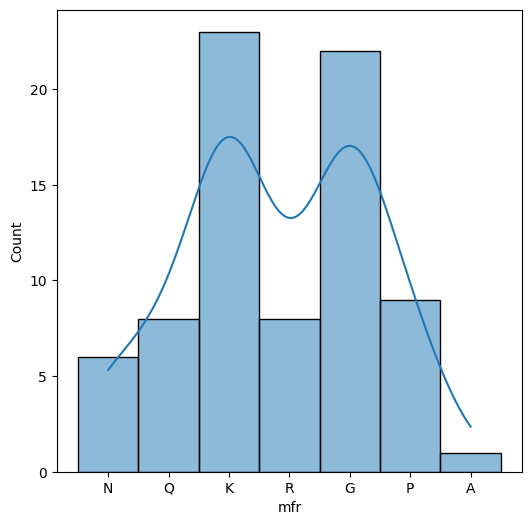

In [9]:
#Analysing the manufracturer:
plt.figure(figsize=(6,6))
sns.histplot(df['mfr'],kde=True)
plt.show()

**This graph shows that two peak which says that it is bimodel distribution .The manufracturer of  Kelloggs and General Mills have the primary producers**

In [10]:
df['mfr'].value_counts()

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

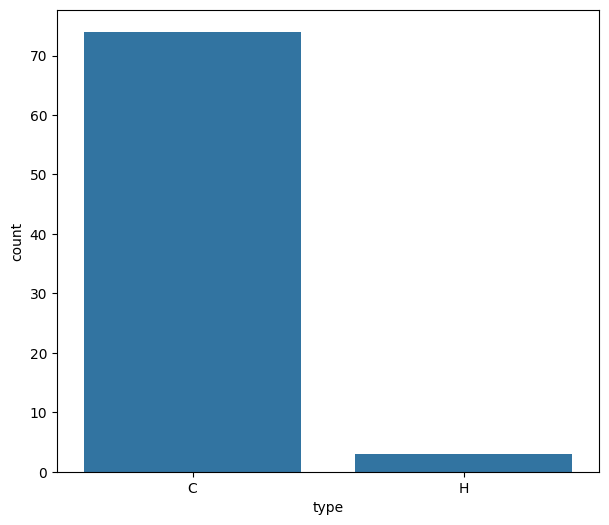

In [11]:
#type of cereal consuming:
plt.figure(figsize=(7,6))
sns.countplot(x=df['type'])
plt.show()

**This countplot reveals that most of the cereals are served by hot and only 3 are served by cold**

In [12]:
df['type'].value_counts()

type
C    74
H     3
Name: count, dtype: int64

In [13]:
# Getting the nutrients:
nutrients=['calories', 'protein', 'fat', 'sodium', 'fiber','carbo', 'sugars', 'potass', 'vitamins']

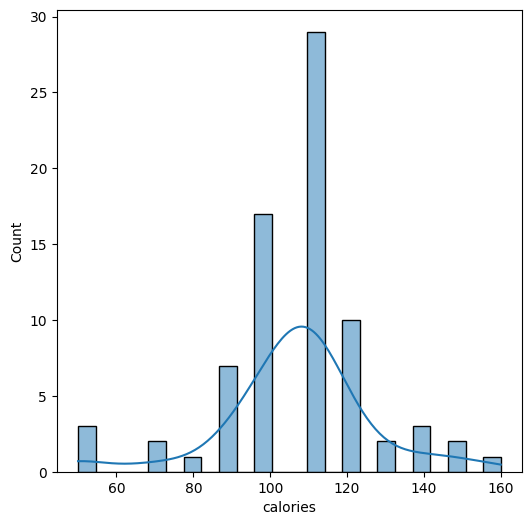

In [14]:
# calories level :
plt.figure(figsize=(6,6))
sns.histplot(x=df['calories'],kde=True)
plt.show()

 **From this plot we see that this has normal distribution and most of the cereals contain 100-120 calories per serving**

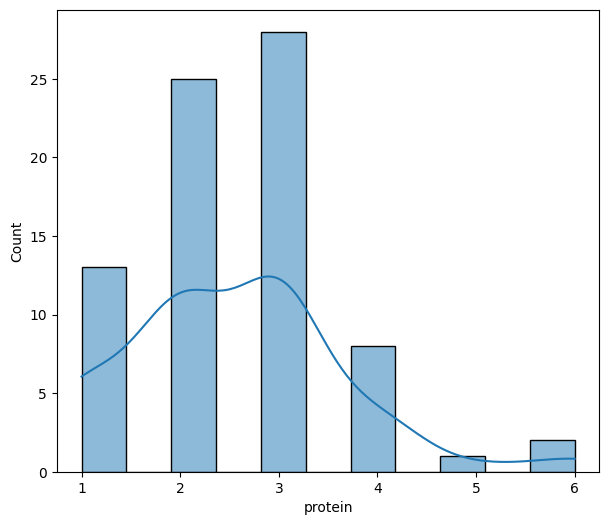

In [15]:
# Protein level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['protein'],kde=True)
plt.show()

**In this graph we notice that this is Right skewed and 2-3 grams of proteins per serving**

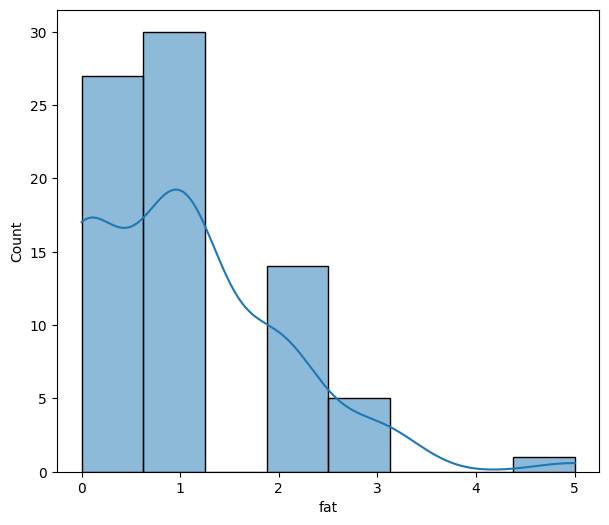

In [16]:
# fat level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['fat'],kde=True)
plt.show()

**This histogram also shows that this is Right skewed and it has 0-1 grams of fat per serving and also there will be an outliers also 5 grams of fat per serving**

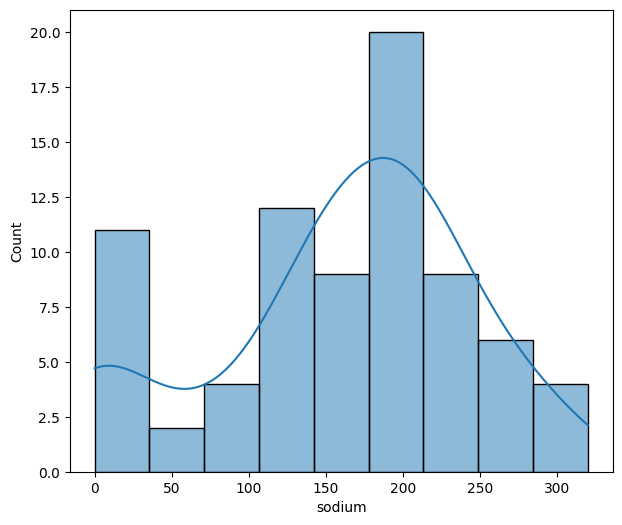

In [17]:
# sodium level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['sodium'],kde=True)
plt.show()

**we notice here 150-250 grams of sodium  per serving and also it shows the normal distribution**

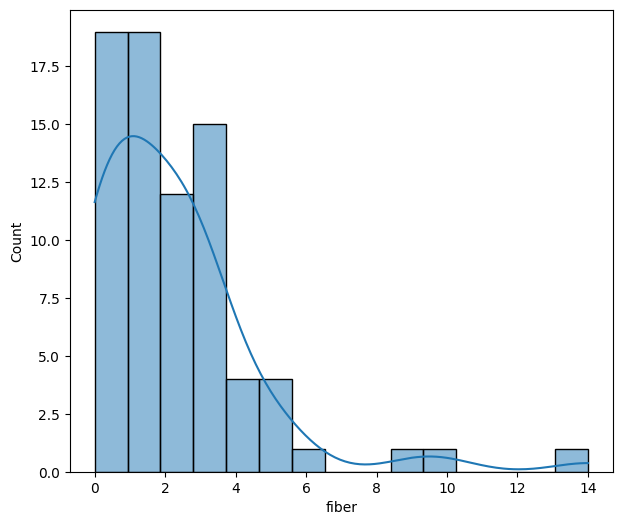

In [18]:
# fiber level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['fiber'],kde=True)
plt.show()

**In plotting the fiber column we came to know that it is Right skewed and most of the cereals are having 0-6 fiber per serving**

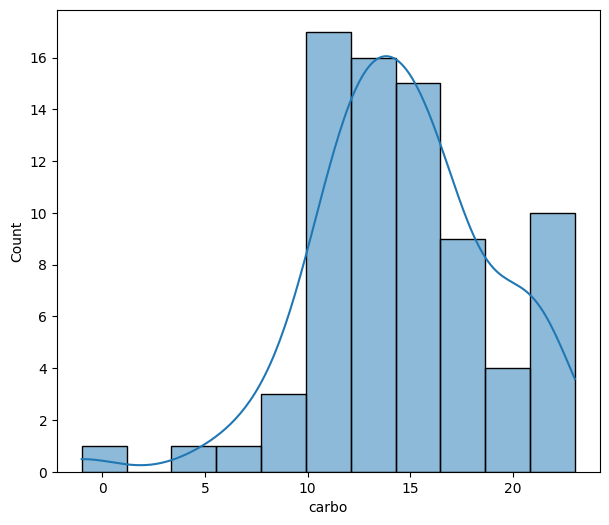

In [19]:
# carbo level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['carbo'],kde=True)
plt.show()

**This carbohydrate columns shows that after plotting them on histogram we notice that it is left skewed most of the cereals having 10-15 carbohygrate per serving**

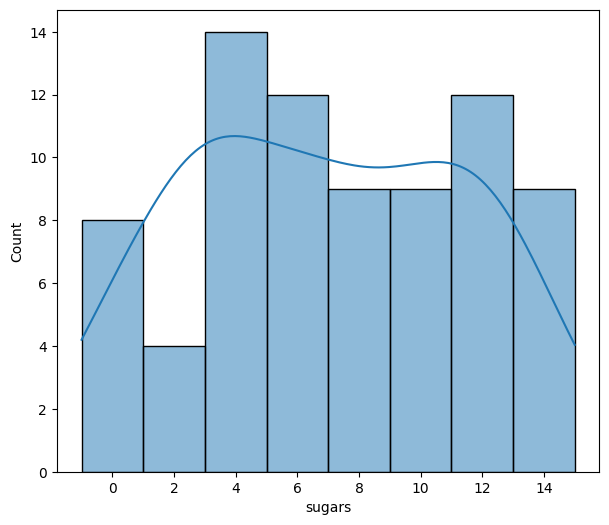

In [20]:
# sugars level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['sugars'],kde=True)
plt.show()

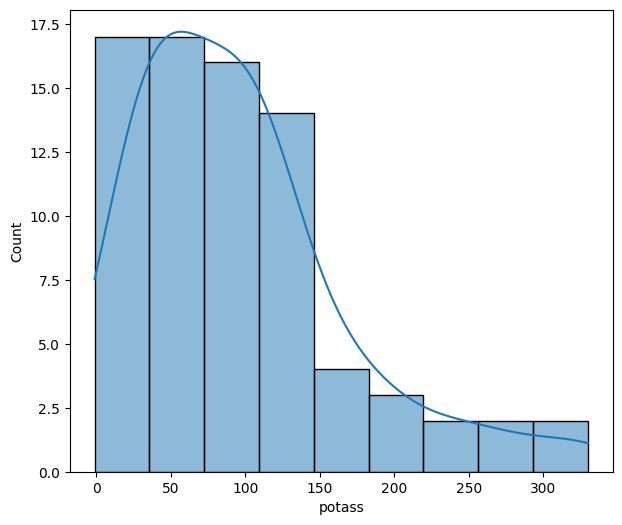

In [21]:
# potass level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['potass'],kde=True)
plt.show()

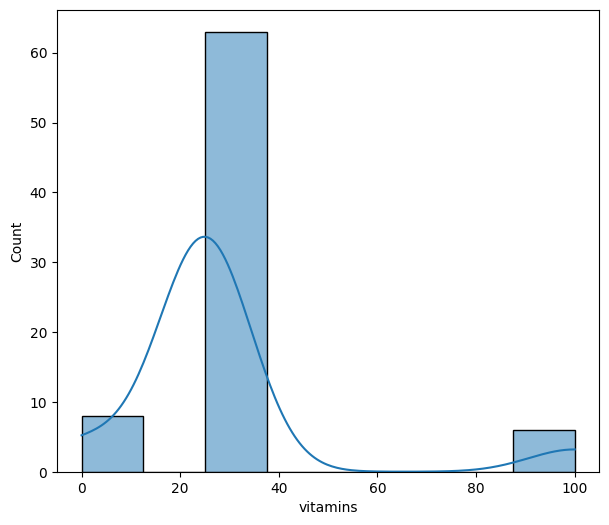

In [22]:
# vitamins level :
plt.figure(figsize=(7,6))
sns.histplot(x=df['vitamins'],kde=True)
plt.show()

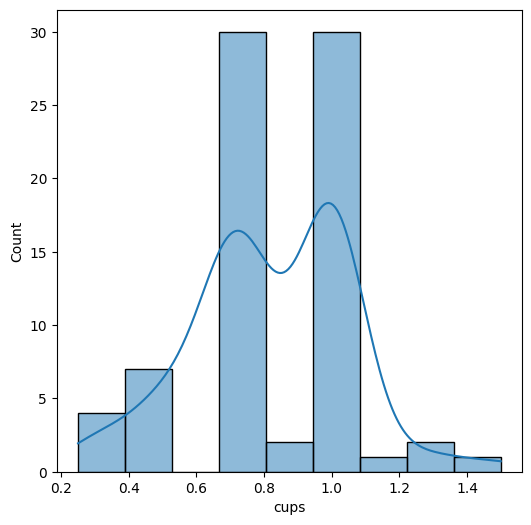

In [23]:
# cup per serving  :
plt.figure(figsize=(6,6))
sns.histplot(x=df['cups'],kde=True)
plt.show()

**From the above column we spotted that there are some outliers but it is somewhat near if there is drastic points it must be removed**

In [24]:
df.head(1)

name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  100% Bran   N    C        70        4    1     130   10.0    5.0       6   

   potass  vitamins  shelf  weight  cups     rating  
0     280        25      3     1.0  0.33  68.402973

### Which cereal has high ratings:

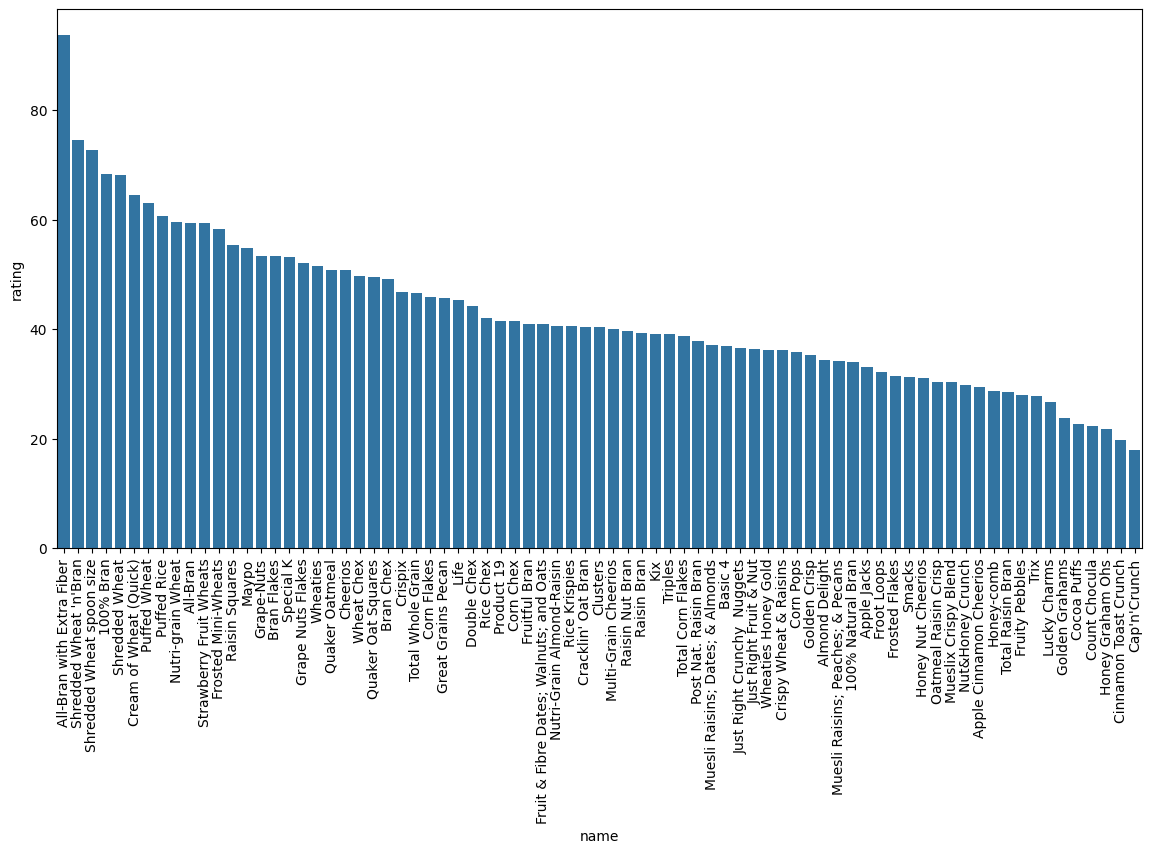

In [25]:
ratings=df.sort_values(by='rating',ascending=False)
plt.figure(figsize=(14,7))
sns.barplot(x='name',y='rating',data=ratings)
plt.xticks(rotation=90)
plt.show()

## From the barplot we take the top 5 rating with names
- 1.All-Bran with Extra Fiber
- 2.Shredded Wheat 'n'Bran
- 3.Shredded Wheat spoon size
- 4.100% Bran
- 5.Shredded Wheat	

## Is there any relationship between sugar content and ratings

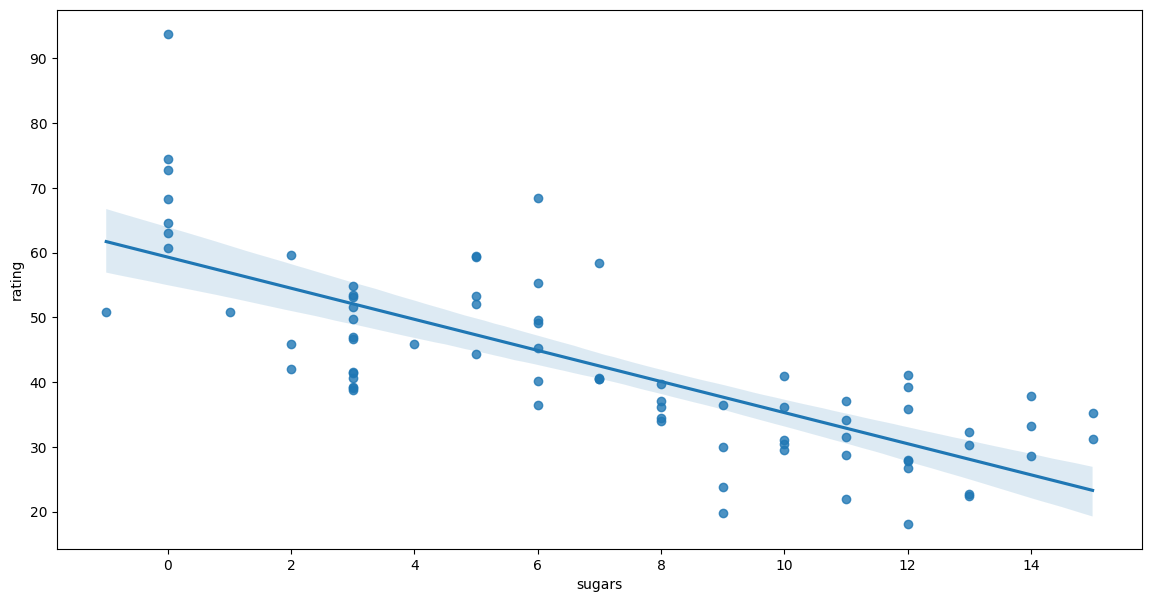

In [26]:
plt.figure(figsize=(14,7))
sns.regplot(x=df['sugars'],y=df['rating'],data=df)
plt.show()

**Here we notice that the product which has low sugar content has high ratings**

## Is there any relationship between fat content and rattings

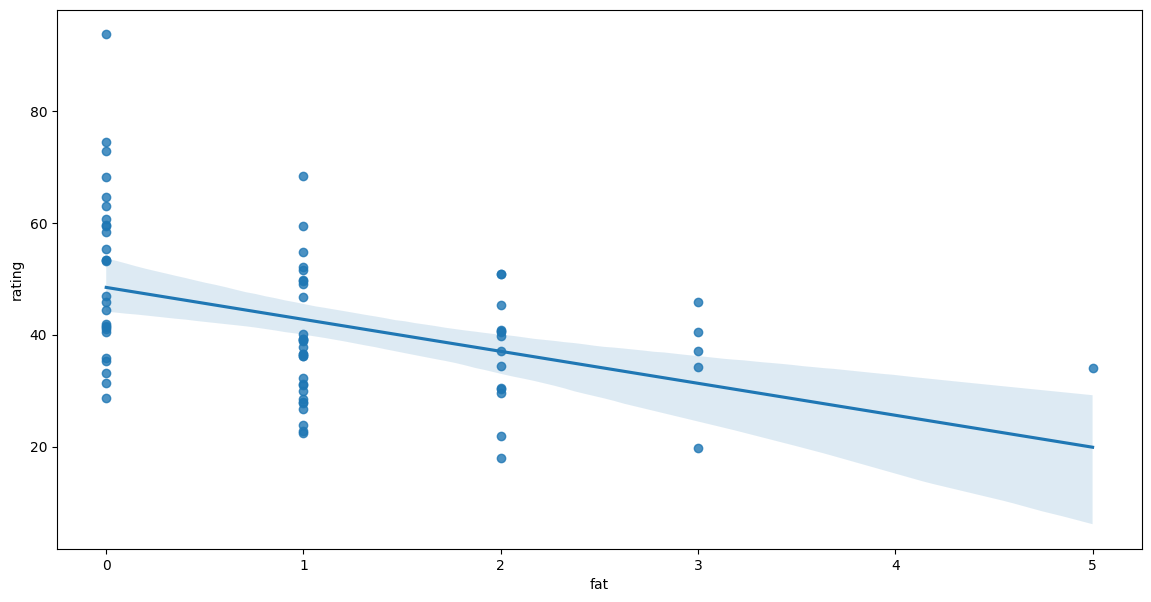

In [27]:
plt.figure(figsize=(14,7))
sns.regplot(x=df['fat'],y=df['rating'])
plt.show()

 **This shows that the cereal which has low fat has high rattings**

In [28]:
ratings.head()

name mfr type  calories  protein  fat  sodium  fiber  \
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
64     Shredded Wheat 'n'Bran   N    C        90        3    0       0    4.0   
65  Shredded Wheat spoon size   N    C        90        3    0       0    3.0   
0                   100% Bran   N    C        70        4    1     130   10.0   
63             Shredded Wheat   N    C        80        2    0       0    3.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
3     8.0       0     330        25      3    1.00  0.50  93.704912  
64   19.0       0     140         0      1    1.00  0.67  74.472949  
65   20.0       0     120         0      1    1.00  0.67  72.801787  
0     5.0       6     280        25      3    1.00  0.33  68.402973  
63   16.0       0      95         0      1    0.83  1.00  68.235885

 ## You can see the top 5 ratings has zero sugar and zero fat and also low sodium

 - **Calories:** **Lower calorie** content might lead to a **higher rating** if the product is considered healthier.

 - **Protein:** **High protein** content is often a desirable trait in cereals and can influence the rating.

 - **Fiber:** **High fiber** content generally contributes to a positive health rating.

 - **Sodium:** **Lower sodium** is typically preferred, as **high sodium intake can be harmful.**

 - **Sugars:** **Less sugar** is generally seen as **healthier**, which might improve the rating.